In [6]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats

# Критерий Хи-квадрат

Критерий Хи-квадрат (или критерий согласия Пирсона) используется для проверки того, соответствует ли категориальная случайна величина выбранному распределению.

Требования:
1. Все наблюдения независимы
2. Количество наблюдений в каждой ячейке больше 5

In [2]:
# 600 бросков игральной кости
# 1 - 70, 2 - 110, 3 - 20, 4 - 300, 5 - 40, 6 - 60
data = np.array([70, 110, 20, 300, 40, 60])
exp = np.array([100] * 6)
# гипотеза H0 - честность игральной кости

In [3]:
stats.chisquare(data, f_exp=exp)

Power_divergenceResult(statistic=526.0, pvalue=1.9468087243178006e-111)

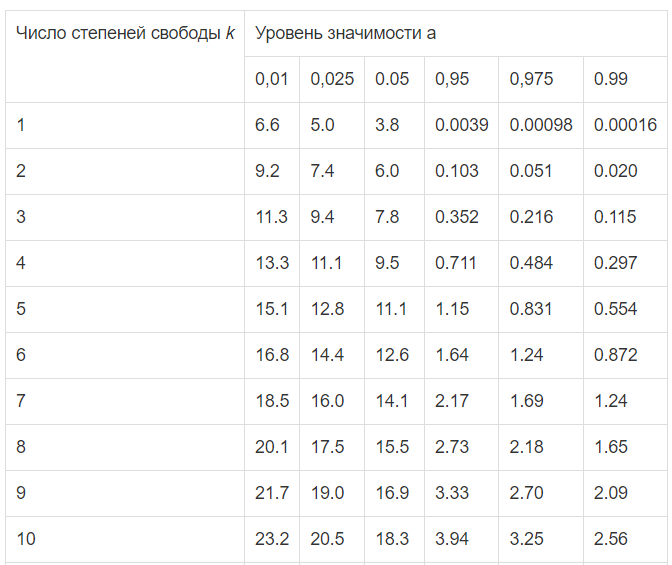600 бросков игральной кости

По таблице значений ищем значение под количество степеней свободы (df = n - 1) и уровень значимости, который мы хотим проверить. В нашем случае уровень значимости 0.05 и соответствующее значение квантили - 11.1. Мы видим, что значение статистики очень сильно превосходит значение 95-процентной квантили, а значит, наверняка с костью что то не так (отклоняем $H_0$)

## Таблицы сопряжённости

In [34]:
data = {
    'Город': np.concatenate([['Москва'] * 1000, ['Санкт-Петербург'] * 700, ['Москва'] * 4000, ['Санкт-Петербург'] * 1200]),
    'Платформа': np.concatenate([['iOS'] * 1000, ['iOS'] * 700, ['Android'] * 4000, ['Android'] * 1200])
}
df = pd.DataFrame(data)

# Построение таблицы сопряженности
cross_tab = pd.crosstab(df['Город'], df['Платформа'])
cross_tab

Платформа,Android,iOS
Город,,
Москва,4000,1000
Санкт-Петербург,1200,700


In [35]:
# одновыборочный критерий хи-квадрат (принимает на вход табличку сопряжённости) 
stats.chi2_contingency(cross_tab)

Chi2ContingencyResult(statistic=209.42969906227677, pvalue=1.82932172469785e-47, dof=1, expected_freq=array([[3768.11594203, 1231.88405797],
       [1431.88405797,  468.11594203]]))

## Кодирование фиктивными переменными

In [37]:
df = pd.DataFrame({'Животное': ['кошка', 'собака', 'крыса', 'кошка']})
df

,Животное
0,кошка
1,собака
2,крыса
3,кошка


In [53]:
# One Hot Encoding
pd.get_dummies(df)

,Животное_кошка,Животное_крыса,Животное_собака
0,1,0,0
1,0,0,1
2,0,1,0
3,1,0,0


In [54]:
# второй способ
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder().fit(df).transform(df).toarray()
ohe

array([[1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.]])

Между фиктивными переменными **идеальная отрицательная корреляция** - в результате возникает **идеальная мультиколлинеарность**. 
Поэтому стандартной практикой является выкидывание одной из получившихся фиктивных переменных.